In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [2]:
zoo = pd.read_csv('C:/Users/admin/Downloads/animal_DB/zoo.csv')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
class_types = pd.read_csv('C:/Users/admin/Downloads/animal_DB/class.csv')
class_types.head(7)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


{'Mammal': 41, 'Bird': 20, 'Reptile': 5, 'Fish': 13, 'Amphibian': 4, 'Bug': 8, 'Invertebrate': 10}


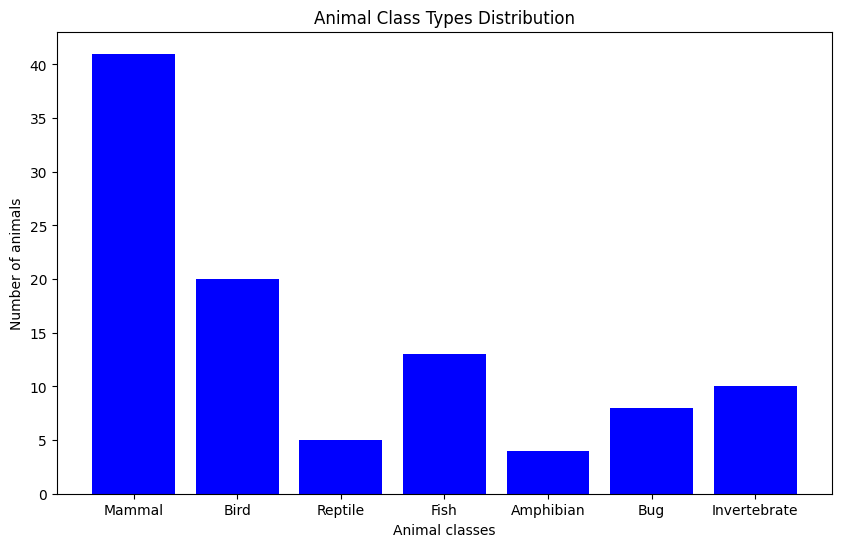

In [4]:
# counting and visualizing animal class types 

animal_classes = class_types.iloc[:,2]
n_of_animals = class_types.iloc[:,1]

animals_distribution = dict(zip(animal_classes, n_of_animals))
print(animals_distribution)

plt.figure(figsize=(10, 6)) #width of 10 inches and a height of 6 inches
plt.bar(animal_classes, n_of_animals, color='blue')
plt.xlabel('Animal classes')
plt.ylabel('Number of animals')
plt.title('Animal Class Types Distribution')
plt.show()

In [5]:

X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)


     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [6]:
print(X_train)

    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
35     1         0     0     1         0        0         0        1   
67     1         0     0     1         0        0         1        1   
74     1         0     0     1         0        1         1        1   
55     1         0     0     1         0        0         0        1   
34     0         0     1     0         0        1         0        1   
..   ...       ...   ...   ...       ...      ...       ...      ...   
89     0         0     1     0         0        1         0        1   
28     1         0     0     1         0        0         0        1   
64     1         0     0     1         0        0         1        1   
15     0         0     1     0         0        1         1        0   
9      1         0     0     1         0        0         0        1   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
35         1         1         0     0     4     1         1   

In [7]:
print(Y_train)

35    1
67    1
74    1
55    1
34    4
     ..
89    5
28    1
64    1
15    7
9     1
Name: class_type, Length: 70, dtype: int64


In [8]:
print(X_test)

    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
79     0         1     1     0         1        1         1        0   
63     1         0     1     1         0        1         1        0   
85     0         0     1     0         0        1         1        0   
39     1         0     1     0         1        0         0        0   
38     0         0     1     0         0        1         1        1   
3      1         0     0     1         0        0         1        1   
19     0         0     0     1         0        1         1        1   
66     0         0     0     1         0        1         1        1   
90     0         0     1     0         0        0         0        0   
14     0         0     1     0         0        1         1        0   
43     0         1     1     0         1        0         0        0   
2      0         0     1     0         0        1         1        1   
1      1         0     0     1         0        0         0     

In [9]:
print(Y_test)

79    2
63    1
85    7
39    6
38    4
3     1
19    1
66    1
90    3
14    7
43    2
2     4
1     1
42    6
61    4
44    1
26    5
95    2
75    1
82    4
81    7
91    3
71    2
53    7
48    1
45    1
58    2
21    2
98    1
6     1
94    1
Name: class_type, dtype: int64


In [10]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 1.08972474 -0.5        -1.12163475 ...  0.58834841  2.31595258
  -0.81649658]
 [ 1.08972474 -0.5        -1.12163475 ...  0.58834841 -0.43178777
   1.22474487]
 [ 1.08972474 -0.5        -1.12163475 ... -1.69967317 -0.43178777
   1.22474487]
 ...
 [ 1.08972474 -0.5        -1.12163475 ...  0.58834841 -0.43178777
   1.22474487]
 [-0.91766294 -0.5         0.89155583 ... -1.69967317 -0.43178777
  -0.81649658]
 [ 1.08972474 -0.5        -1.12163475 ... -1.69967317  2.31595258
  -0.81649658]]


In [12]:
print(X_test)

[[-0.91766294  2.          0.89155583 -0.84102145  1.69967317  1.58113883
   1.02899151 -1.30088727  0.45485883  0.5        -0.30618622 -0.40824829
  -0.39773369  0.58834841 -0.43178777 -0.81649658]
 [ 1.08972474 -0.5         0.89155583  1.18903032 -0.58834841  1.58113883
   1.02899151 -1.30088727  0.45485883  0.5        -0.30618622 -0.40824829
   0.59660054  0.58834841 -0.43178777  1.22474487]
 [-0.91766294 -0.5         0.89155583 -0.84102145 -0.58834841  1.58113883
   1.02899151 -1.30088727 -2.19848433 -2.         -0.30618622 -0.40824829
   1.09376766 -1.69967317 -0.43178777 -0.81649658]
 [ 1.08972474 -0.5         0.89155583 -0.84102145  1.69967317 -0.63245553
  -0.97182532 -1.30088727 -2.19848433  0.5         3.26598632 -0.40824829
   1.59093477 -1.69967317  2.31595258 -0.81649658]
 [-0.91766294 -0.5         0.89155583 -0.84102145 -0.58834841  1.58113883
   1.02899151  0.76870611  0.45485883 -2.         -0.30618622  2.44948974
  -1.39206792  0.58834841 -0.43178777 -0.81649658]
 [ 1.

In [13]:
#KNN 
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #“minkowski”,which results in the standard Euclidean distance when p = 2
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
#predicting a new result
Y_pred = classifier.predict(X_test[10:25])
print(Y_pred)

[2 4 1 6 4 1 5 2 1 4 6 5 2 7 1]


In [15]:
print(Y_test[10:25])


43    2
2     4
1     1
42    6
61    4
44    1
26    5
95    2
75    1
82    4
81    7
91    3
71    2
53    7
48    1
Name: class_type, dtype: int64


In [ ]:

   Y_pred = classifier.predict(X_test[10:25])
   Y_test = Y_test[10:25]
   #comparing results with np.intersect1d
#print(len(np.intersect1d(Y_pred, Y_test)/len(Y_pred))
#print(np.concatenate(Y_pred, Y_test))

In [ ]:
#Decision tree classification
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [43]:
y_pred_tree = classifier.predict(X_test[1:25])
print(y_pred_tree)

[1 7 6 4 1 1 1 2 7 2 4 1 6 4 1 5 2 1 4 7 5 2 7 1]


In [44]:
print(Y_test[1:25])

63    1
85    7
39    6
38    4
3     1
19    1
66    1
90    3
14    7
43    2
2     4
1     1
42    6
61    4
44    1
26    5
95    2
75    1
82    4
81    7
91    3
71    2
53    7
48    1
Name: class_type, dtype: int64


In [ ]:
#compare the predictions with the real values

In [40]:
#Random forest
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [47]:
y_pred_forest = classifier.predict(X_test[0:30])
print(y_pred_forest)

[2 1 7 6 4 1 1 1 2 7 2 4 1 6 4 1 5 2 1 4 7 5 2 7 1 1 2 2 1 1]


In [48]:
print(Y_test[0:30])

79    2
63    1
85    7
39    6
38    4
3     1
19    1
66    1
90    3
14    7
43    2
2     4
1     1
42    6
61    4
44    1
26    5
95    2
75    1
82    4
81    7
91    3
71    2
53    7
48    1
45    1
58    2
21    2
98    1
6     1
Name: class_type, dtype: int64


In [ ]:
#compare the predictions with the real values, confusion matrix?

In [ ]:
#SVM
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
classifier = svm.SVC()
classifier.fit(X_train, Y_train)

In [52]:
y_pred_svm = classifier.predict(X_test[5:20])
print(y_pred_svm)

[1 1 1 2 7 2 4 1 6 4 1 5 2 1 4]


In [53]:
print(Y_test[5:20])

3     1
19    1
66    1
90    3
14    7
43    2
2     4
1     1
42    6
61    4
44    1
26    5
95    2
75    1
82    4
Name: class_type, dtype: int64


In [ ]:
#compare the predictions with the real values, confusion matrix?

In [57]:
#Naive Bayes
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [58]:
y_pred_NB = classifier.predict(X_test[5:20])
print(y_pred_NB)

[1 2 4 1 1 7 1 2 7 4 6 1 6 2 4]


In [59]:
print(Y_test[5:20])

94    1
16    2
73    4
54    1
96    1
53    7
93    1
78    2
13    7
7     4
30    6
22    1
24    6
33    2
8     4
Name: class_type, dtype: int64


In [ ]:
#compare the predictions with the real values, confusion matrix?

In [ ]:
#comparing algorithms